<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab05_Part1__Simple_Harmonic_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 1: Collect Data and Plot Solution

* In the first part of this week's lab, we will collect data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |    |  |  |
| $\omega$ |    |  |  |
| $\phi$   |    |  |  |

## 0. Import modules

In the cell below, import numpy and matplotlib

In [1]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt
import math


## 1. Collecting Your Data

* Obtain some position vs. time data for a simple harmonic oscillator (mass on spring).

### Procedure

(3 pts)

* Briefly describe the procedure you used to set up your system and collect your data.  
* Take a picture of your experimental setup and upload it here.


**Your Answer Here**

## 2. Upload Data Into Colab

(2 points)

* In the bottom left of your window, click on the `<>` icon to access `Code snippets`.

* Select `Open files from your local file system`, then `Insert`.

* Select your data files to upload, and upload them.



In [2]:
# upload your data
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Spring-data.csv to Spring-data.csv
User uploaded file "Spring-data.csv" with length 45522 bytes


In [3]:
# use astropy to read in your data file
from astropy.table import Table
data = Table.read("Spring-data.csv")

In [4]:
data[1]

Data Set 1:Time(s),Data Set 1:Position(m),Data Set 1:Velocity(m/s),Data Set 1:Acceleration(m/s²),Data Set 2:Time(s),Data Set 2:Position(m),Data Set 2:Velocity(m/s),Data Set 2:Acceleration(m/s²),Data Set 3:Time(s),Data Set 3:Position(m),Data Set 3:Velocity(m/s),Data Set 3:Acceleration(m/s²),Data Set 4:Time(s),Data Set 4:Position(m),Data Set 4:Velocity(m/s),Data Set 4:Acceleration(m/s²),Data Set 5:Time(s),Data Set 5:Position(m),Data Set 5:Velocity(m/s),Data Set 5:Acceleration(m/s²),Data Set 6:Time(s),Data Set 6:Position(m),Data Set 6:Velocity(m/s),Data Set 6:Acceleration(m/s²)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.05,0.614300012588501,0.153972456852595,-1.586166493318699,0.05,0.5604000091552734,-0.760138945447074,0.7630254889343987,0.05,0.4875999987125397,-0.1315831310219235,1.7996582554446325,0.05,0.30970001220703125,-0.28549989064534503,3.556232745816678,0.05,0.6664999723434448,0.00047218468454149055,-1.259678120230451,0.05,0.6596999764442444,-0.1439167724715339,-2.30910916203334


* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [5]:
# save the time and position data
time = data["Data Set 1:Time(s)"]
position = data["Data Set 1:Position(m)"]

# subtract the mean of the position from the position
x = position - np.mean(position)

## 3. Visualize and Analyze Your Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using python.

Text(0, 0.5, 'Position (m)')

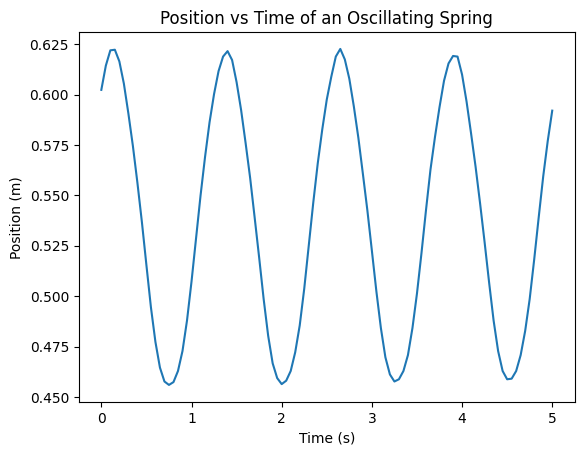

In [57]:
# code to plot your position vs time data here
plt.plot(time,position)
plt.title('Position vs Time of an Oscillating Spring')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')


### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.

To find the amplitude, I simply found the max between times 0 and 1 as well as between 1 and 2. Then I found those indicies and used those same indicies for the time array. This gave me the amplitude and the time associated with those peaks. By subtracting these time, it gives you the period.

In [7]:
x[53]
data['Data Set 1:Position(m)'][53]

0.6226000189781189

In [8]:
x1 = np.zeros(np.where(time==1.0)[0][0])
t1 = np.zeros(np.where(time==1.0)[0][0])
for i in range(0,20):
  x1[i] = position[i]
  t1[i] = time[i]

x2 = np.zeros(np.where(time==1.0)[0][0])
t2 = np.zeros(np.where(time==1.0)[0][0])
for i in range(20,40):
  x2[i-20] = position[i]
  t2[i-20] = time[i]

In [9]:
xmax1 = np.where(position==max(x1))
xmax2 = np.where(position==max(x2))

In [10]:
xmax1,xmax2

((array([3]),), (array([28]),))

In [23]:
# values of period and amplitude from the graph

A = x[xmax1]# amplitude in m
T = time[xmax2] - time[xmax1]# period in sec


#### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [24]:
# calculate omega

omega = (2 * np.pi) / T

<Column name='Data Set 1:Time(s)' dtype='float64' length=1>
5.026548245743669

#### Plot data and Analytic Solution

(5 points)

* copy your code for plotting the position versus time
* add code to overplot the analytic solution

* Determine the best value of $\phi$ using trial and error.


In [26]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def calc_SHO(A,omega,phi,t):
  x_t = A * np.cos(omega * t - phi)
  return x_t


In [27]:
A

<Column name='Data Set 1:Position(m)' dtype='float64' length=1>
0.08448218945229402

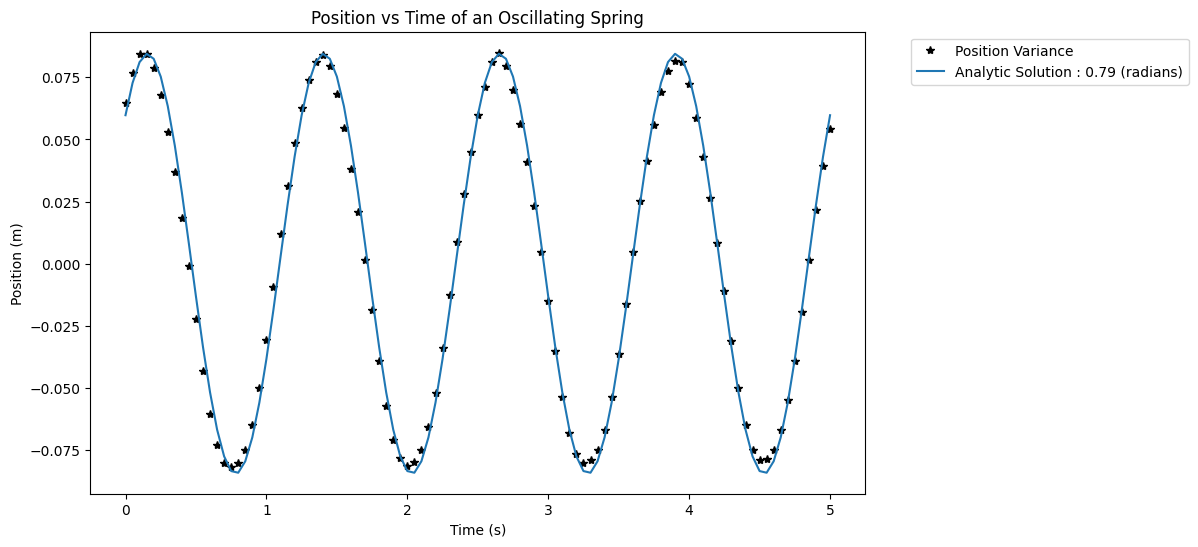

In [69]:
# enter your code to plot your data and analytic solution
# be sure to use your function
phi = np.pi/4

plt.figure(figsize=(10,6))
plt.plot(time,x, 'k*',label='Position Variance')
plt.plot(time,calc_SHO(A,omega,phi,time), label=f'Analytic Solution : {phi:.2f} (radians)')
plt.title('Position vs Time of an Oscillating Spring')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Calculate the spring constant and intial conditions

(3 points)

From your fit, and anything else you need to measure, determine:
* the spring constant, $k$
* the initial position, $x_0$
* the initial velocity, $v_{x0}$


In [70]:
# calculate spring constant
m = 0.1 # kg
k = omega ** 2 * m

In [76]:
# calculate intial position here
pos_x = position[0]
pos_x

0.6022999882698059

In [79]:
# calculate the intial velocity here
vel = data['Data Set 1:Velocity(m/s)'][0]
vel

0.2074448267618815